### Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_df = pd.read_csv('data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

### Analysis
Using the data on the weather in Philadelphia from 2005 - 2025, we will ask a few questions to observe interesting trends about the weather that may not be immediately obvious.

1. How did the temperature on Christmas day change over time?
2. How did the yearly average temperature change from 2005-2025?
3. Which days of the week experienced the most rain?
4. How did annual total snowfall change over time?
5. How did the highest and lowest recorded temperatures for each year change over time?

#### Question 1: How did the low and high temperature on Christmas day change over time?

Text(0.5, 0, 'Year')

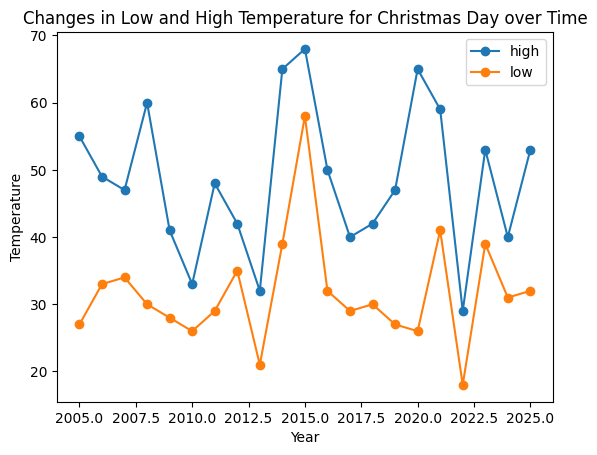

In [3]:
christmas_df = weather_df.query("day=='December 25'").set_index('year')[['high','low']]
christmas_df.plot(kind = 'line', style = '-o')
plt.title("Changes in Low and High Temperature for Christmas Day over Time")
plt.ylabel("Temperature")
plt.xlabel("Year")

From the plot above, we can see that the temperatures on Christmas day fluctuate fairly significantly year by year.

In [4]:
print(f"The hottest Christmas was {christmas_df['high'].idxmax()}, with a high temperature of {christmas_df['high'].max()} degrees Farenheit.")

The hottest Christmas in the dataset was in 2015, with a high temperature of 68 degrees Farenheit.


An additional interesting fact is that 2015 was the hottest Christmas in any year from 1874 to 2025, tied only with Christmas in 1964. (According to https://www.stormfax.com/phlChristmasWx.htm)

In [5]:
print(f"The coldest Christmas was {christmas_df['low'].idxmin()}, with a low temperature of {christmas_df['low'].min()} degrees Farenheit.")

The coldest Christmas in the dataset was in 2022, with a low temperature of 18 degrees Farenheit.


However, this is still 17 degrees Farenheit warmer than the coldest Christmas day, which was in 1980 and 1983, which had a minimum temperature of just 1 degree Farenheit. (https://www.stormfax.com/phlChristmasWx.htm)

In [6]:
print(f"The Christmas with the greatest temperature change was in {(christmas_df['high'] - christmas_df['low']).idxmax()}, with a temperature difference between high and low of {(christmas_df['high'] - christmas_df['low']).max()} degrees Farenheit.")

The Christmas with the greatest temperature change was in 2020, with a temperature difference between high and low of 39 degrees Farenheit.


#### Question 2: How did the yearly average temperature change from 2005-2025?

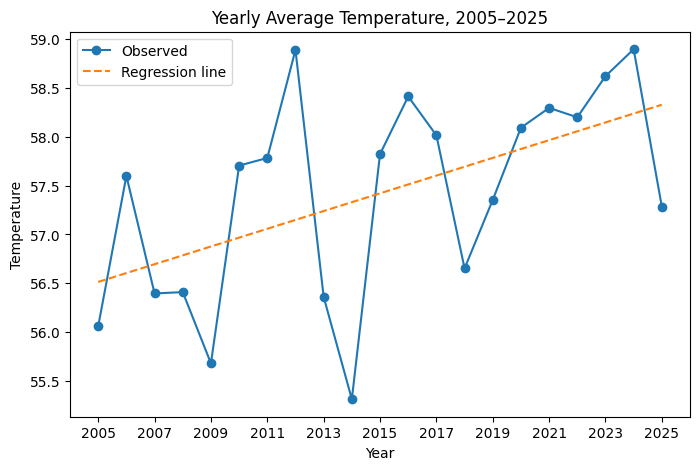

Equation: y = 0.0907 * x + -125.2568


In [37]:
weather_df['avg'] = (weather_df['high'] + weather_df['low']) / 2

yearly_avg = weather_df.groupby('year')['avg'].mean()

x = yearly_avg.index.values
y = yearly_avg.values

slope, intercept = np.polyfit(x, y, 1)
y_hat = intercept + slope * x

plt.figure(figsize=(8,5))

plt.plot(x, y, '-o', label='Observed')
plt.plot(x, y_hat, '--', label='Regression line')

plt.title("Yearly Average Temperature, 2005–2025")
plt.xlabel("Year")
plt.ylabel("Temperature")

plt.xticks(yearly_avg.index[::2])
plt.legend()
plt.show()

print(f"Equation: y = {slope:.4f} * x + {intercept:.4f}")

From the plot above, we can see that there were many fluctuations in the yearly average temperature, with peaks in 2006, 2012, 2016, 2021, 2024.

The plotted regression line on the graph shows that the yearly average temperature increases as the years went by. More specifically, every year, the yearly average temperature goes up by 0.0907 degrees Farenheit on average. This clearly demonstrates the effects on global warming over the past 20 years. 

#### Question 3: Which days of the week experienced the most rain?

dow_name
Monday       120.22
Thursday     129.81
Tuesday      133.53
Sunday       137.94
Wednesday    139.84
Saturday     148.48
Friday       149.46
Name: rain, dtype: float64

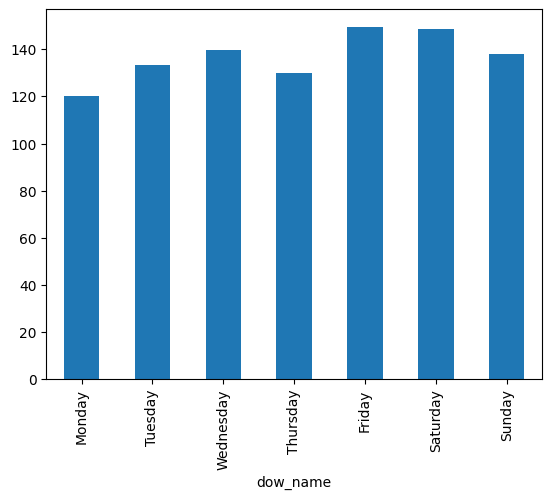

In [77]:
daily_rain = weather_df.groupby('dow_name')['rain'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']) # reindexing so that days start on Monday.

daily_rain.plot(kind = 'bar')
daily_rain.sort_values()

From the above bar plot, it is evident that Friday was the day of the week which had the highest amount of total accumulated rain, with a total of 149.46 inches of rain over the past 20 years. It is followed closely by Saturday at 148.48 inches, before dropping by a considerable margin to 139.84 inches.

This suggests that weekends over the past two decades experienced relatively higher rainfall accumulation. However, this relationship is purely observational and should not be interpreted as a systematic weekday effect.

#### 4. How did annual total snowfall change over time?

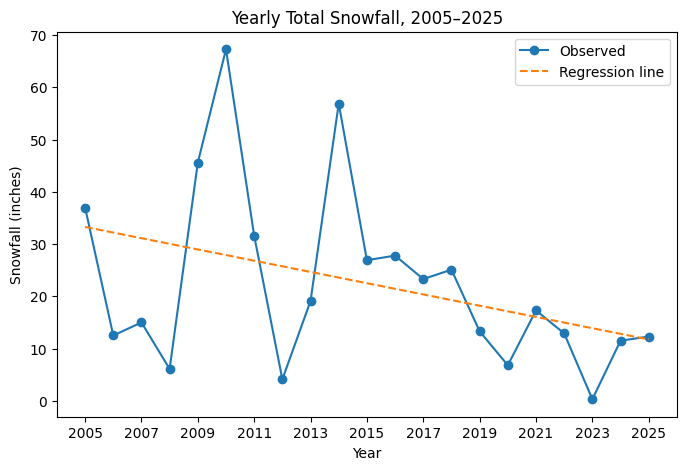

year
2010    67.3
2014    56.9
2009    45.6
2005    37.0
2011    31.6
Name: snow, dtype: float64

In [83]:
annual_snow = weather_df.groupby('year')['snow'].sum()

x = annual_snow.index.values
y = annual_snow.values

slope, intercept = np.polyfit(x, y, 1)
y_hat = intercept + slope * x

plt.figure(figsize=(8,5))

plt.plot(x, y, '-o', label='Observed')
plt.plot(x, y_hat, '--', label='Regression line')

plt.title("Yearly Total Snowfall, 2005–2025")
plt.xlabel("Year")
plt.ylabel("Snowfall (inches)")

plt.xticks(yearly_avg.index[::2])
plt.legend()
plt.show()

annual_snow.sort_values(ascending = True).head(5)
annual_snow.sort_values(ascending = False).head(5)


Based on the above regression line on the yearly total snowfall over the past 20 years, we can see that the amount of snow recorded in Philadelphia has decreased over the years.

2010 saw the greatest amount of snow in the data set receiving 67.3 inches, which is 11.6 inches more than 2014, the year with the second highest snowfall. An interesting fact is that during this year's snowstorm on January 26, certain parts of Philadelphia received 9.3 inches of snow, which is already more snow than the total yearly snowfall observed in 2023, 2012, 2008 and 2020.

#### Question 5: How did the highest and lowest recorded temperatures for each year change over time?

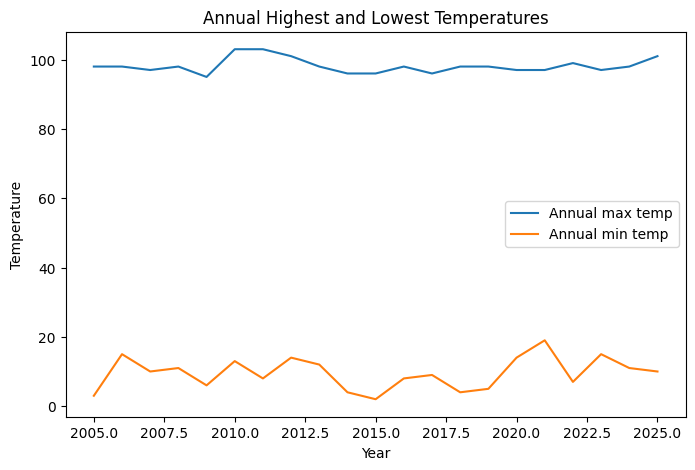

Mean annual maximum temperature: 98.19
Mean annual minimum temperature: 9.52
Std dev of annual maximum temperatures: 2.16
Std dev of annual minimum temperatures: 4.57
Year with highest annual maximum temperature: 2010, temp: 103
Year with lowest annual minimum temperature: 2015, temp: 2


In [85]:
highest_temps = weather_df.groupby('year')['high'].max()
lowest_temps = weather_df.groupby('year')['low'].min()

x = highest_temps.index.values

plt.figure(figsize=(8,5))
plt.plot(x, highest_temps, label='Annual max temp')
plt.plot(x, lowest_temps, label='Annual min temp')

plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Annual Highest and Lowest Temperatures")
plt.legend()
plt.show()

mean_max_temp = highest_temps.mean()
mean_min_temp = lowest_temps.mean()

print(f"Mean annual maximum temperature: {mean_max_temp:.2f}")
print(f"Mean annual minimum temperature: {mean_min_temp:.2f}")

std_max_temp = highest_temps.std()
std_min_temp = lowest_temps.std()

print(f"Std dev of annual maximum temperatures: {std_max_temp:.2f}")
print(f"Std dev of annual minimum temperatures: {std_min_temp:.2f}")

year_highest_max = highest_temps.idxmax()
year_lowest_min = lowest_temps.idxmin()

print(f"Year with highest annual maximum temperature: {year_highest_max}, temp: {highest_temps.max()}")
print(f"Year with lowest annual minimum temperature: {year_lowest_min}, temp: {lowest_temps.min()}")


The annual maximum temperatures were fairly consistent throughout the 20 years, with a standard deviation of 2.16 degrees and an average maximum temperature of 98.19 degrees. The year with the hottest day was in 2010, with a temperature of 103 degrees, which interestingly enough was the year with the highest recorded annual snowfall in the dataset.

Annual minimum temperatures have greater temperature fluctuation, with standard deviation of 4.57 degrees. The average annual minimum temperatures was 9.52 degrees. The year with the coldest day was in 2015 at 2 degrees.